In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
pd.set_option('display.max_columns', None)

In [2]:
# directory = './results/mdi_local.real_data_regression/diabetes_regression_parallel/varying_sample_row_n/'
# directory = './results/mdi_local.real_data_classification/diabetes_classification_parallel/varying_sample_row_n/'
directory = './results/mdi_local.real_data_regression/Satellite_image_parallel/varying_sample_row_n/'
folder_names = [folder for folder in os.listdir(directory) if os.path.isdir(os.path.join(directory, folder))]
experiments_seeds = []
for folder_name in folder_names:
    experiments_seeds.append(int(folder_name[4:]))
combined_df = pd.DataFrame()
for seed in experiments_seeds:
    df = pd.read_csv(os.path.join(directory, f"seed{seed}/results.csv"))
    combined_df = pd.concat([combined_df, df], ignore_index=True)

In [3]:
# df = pd.read_csv("./results/mdi_local.real_data_regression/diabetes_regression/varying_sample_row_n/seed331/results.csv")
# df = pd.read_csv("./results/mdi_local.real_data_classification/diabetes_classification/varying_sample_row_n/seed331/results.csv")
# df = pd.read_csv("./results/mdi_local.real_data_regression/satellite_new_implementation/varying_sample_row_n/seed331/results.csv")
# df = pd.read_csv("./results/mdi_local.real_data_regression/satellite_image/varying_sample_row_n/seed331/results.csv")
# df = pd.read_csv("./results/mdi_local.real_data_classification/juvenile_new/varying_sample_row_n/seed331/results.csv")
# df = pd.read_csv("./results/mdi_local.real_data_regression/ca_housing/varying_sample_row_n/seed331/results.csv")

In [4]:
combined_df

,sample_row_n,sample_row_n_name,rep,n_estimators,min_samples_leaf,max_features,cv_ridge,calc_loo_coef,include_raw,sample_split,fit_on,model,fi,splitting_strategy,train_size,num_features,data_split_seed,test_size,test_all_mse,test_all_r2,sample_test_0,sample_test_1,sample_test_2,sample_test_3,sample_test_4,sample_test_5,sample_test_6,sample_test_7,sample_test_8,sample_test_9,sample_test_10,sample_test_11,sample_test_12,sample_test_13,sample_test_14,sample_test_15,sample_test_16,sample_test_17,sample_test_18,sample_test_19,sample_test_20,sample_test_21,sample_test_22,sample_test_23,sample_test_24,sample_test_25,sample_test_26,sample_test_27,sample_test_28,sample_test_29,sample_test_30,sample_test_31,sample_test_32,sample_test_33,sample_test_34,sample_test_35,sample_test_36,sample_test_37,sample_test_38,sample_test_39,sample_test_40,sample_test_41,sample_test_42,sample_test_43,sample_test_44,sample_test_45,sample_test_46,sample_test_47,sample_test_48,sample_test_49,sample_test_50,sample_test_51,sample_test_52,sample_test_53,sample_test_54,sample_test_55,sample_test_56,sample_test_57,sample_test_58,sample_test_59,sample_test_60,sample_test_61,sample_test_62,sample_test_63,sample_test_64,sample_test_65,sample_test_66,sample_test_67,sample_test_68,sample_test_69,sample_test_70,sample_test_71,sample_test_72,sample_test_73,sample_test_74,sample_test_75,sample_test_76,sample_test_77,sample_test_78,sample_test_79,sample_test_80,sample_test_81,sample_test_82,sample_test_83,sample_test_84,sample_test_85,sample_test_86,sample_test_87,sample_test_88,sample_test_89,sample_test_90,sample_test_91,sample_test_92,sample_test_93,sample_test_94,sample_test_95,sample_test_96,sample_test_97,sample_test_98,sample_test_99,ablation_seed_0,ablation_seed_1,ablation_seed_2,ablation_seed_3,ablation_seed_4,ablation_seed_5,ablation_seed_6,ablation_seed_7,ablation_seed_8,ablation_seed_9,fi_time,MSE_before_ablation,R_2_before_ablation,MSE_after_ablation_1,R_2_after_ablation_1,MSE_after_ablation_2,R_2_after_ablation_2,MSE_after_ablation_3,R_2_after_ablation_3,MSE_after_ablation_4,R_2_after_ablation_4,MSE_after_ablation_5,R_2_after_ablation_5,MSE_after_ablation_6,R_2_after_ablation_6,MSE_after_ablation_7,R_2_after_ablation_7,MSE_after_ablation_8,R_2_after_ablation_8,MSE_after_ablation_9,R_2_after_ablation_9,MSE_after_ablation_10,R_2_after_ablation_10,MSE_after_ablation_11,R_2_after_ablation_11,MSE_after_ablation_12,R_2_after_ablation_12,MSE_after_ablation_13,R_2_after_ablation_13,MSE_after_ablation_14,R_2_after_ablation_14,MSE_after_ablation_15,R_2_after_ablation_15,MSE_after_ablation_16,R_2_after_ablation_16,MSE_after_ablation_17,R_2_after_ablation_17,MSE_after_ablation_18,R_2_after_ablation_18,MSE_after_ablation_19,R_2_after_ablation_19,MSE_after_ablation_20,R_2_after_ablation_20,MSE_after_ablation_21,R_2_after_ablation_21,MSE_after_ablation_22,R_2_after_ablation_22,MSE_after_ablation_23,R_2_after_ablation_23,MSE_after_ablation_24,R_2_after_ablation_24,MSE_after_ablation_25,R_2_after_ablation_25,MSE_after_ablation_26,R_2_after_ablation_26,MSE_after_ablation_27,R_2_after_ablation_27,MSE_after_ablation_28,R_2_after_ablation_28,MSE_after_ablation_29,R_2_after_ablation_29,MSE_after_ablation_30,R_2_after_ablation_30,MSE_after_ablation_31,R_2_after_ablation_31,MSE_after_ablation_32,R_2_after_ablation_32,MSE_after_ablation_33,R_2_after_ablation_33,MSE_after_ablation_34,R_2_after_ablation_34,MSE_after_ablation_35,R_2_after_ablation_35,MSE_after_ablation_36,R_2_after_ablation_36,ablation_time,split_seed,rf_model,index,var,true_support
0,NaN,keep_all_rows,0,100.0,5.0,0.33,5.0,False,NaN,NaN,NaN,RF,LFI_with_raw_CV_RF,train-test,4311,36,2072,2124,0.540287,0.889356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [5]:
# Print the run-time of the feature importance algorithm
averages = combined_df.groupby('fi')['fi_time'].mean().reset_index()
print(averages)

                     fi      fi_time
0   Kernel_SHAP_RF_plus   187.238720
1    LFI_with_raw_CV_RF  1047.734158
2   LFI_with_raw_OOB_RF    31.794402
3       LFI_with_raw_RF   253.819380
4  LFI_with_raw_RF_plus     1.746028
5          LIME_RF_plus   325.031721
6                MDI_RF     7.723098
7           TreeSHAP_RF     8.408910


In [6]:
# Print the ablation time
averages = combined_df.groupby('fi')['ablation_time'].mean().reset_index()
print(averages)

                     fi  ablation_time
0   Kernel_SHAP_RF_plus     472.421079
1    LFI_with_raw_CV_RF      17.546960
2   LFI_with_raw_OOB_RF      15.081715
3       LFI_with_raw_RF      37.499144
4  LFI_with_raw_RF_plus     723.406854
5          LIME_RF_plus     465.413368
6                MDI_RF      18.344737
7           TreeSHAP_RF      17.674746


In [7]:
#################### Change the following according to the dataset ####################
task = "regression" #"regression" "classification"
########################################################################################
methods_rf = ["LFI_with_raw_RF", "LFI_with_raw_CV_RF", "LFI_with_raw_OOB_RF", "MDI_RF", "TreeSHAP_RF"]
methods_rf_plus = ["Kernel_SHAP_RF_plus","LFI_with_raw_RF_plus", "LIME_RF_plus"]
n_testsize = combined_df[['train_size', 'test_size']].drop_duplicates()
num_features = combined_df['num_features'].drop_duplicates()[0]
metrics = {"regression": ["MSE", "R_2"], "classification": ["AUROC","AUPRC", "F1"]}

In [8]:
if task == "classification":
    grouped = combined_df.groupby("model")
    for model, group_df in grouped:
        print("Model:", model)
        print("AUROC before ablation:", group_df["test_all_auc"].mean())
        print("AUPRC before ablation:", group_df["test_all_auprc"].mean())
        print("F1 before ablation:", group_df["test_all_f1"].mean())
        print()
elif task == "regression":
    grouped = combined_df.groupby("model")
    for model, group_df in grouped:
        print("Model:", model)
        print("MSE before ablation:", group_df["test_all_mse"].mean())
        print("R2 before ablation:", group_df["test_all_r2"].mean())
        print()

Model: RF
MSE before ablation: 0.525096446374089
R2 before ablation: 0.8904245038910084

Model: RF_plus
MSE before ablation: 0.5731719599969073
R2 before ablation: 0.8803756066543206



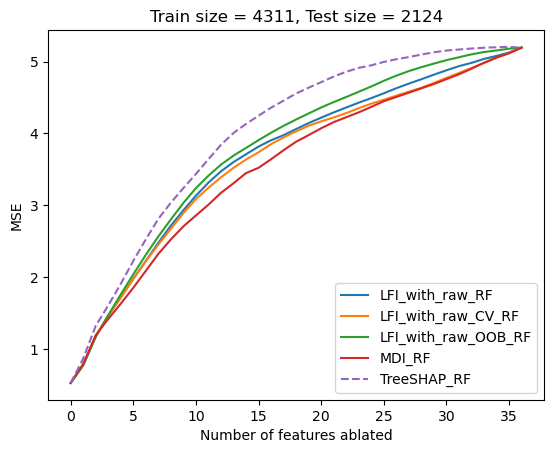

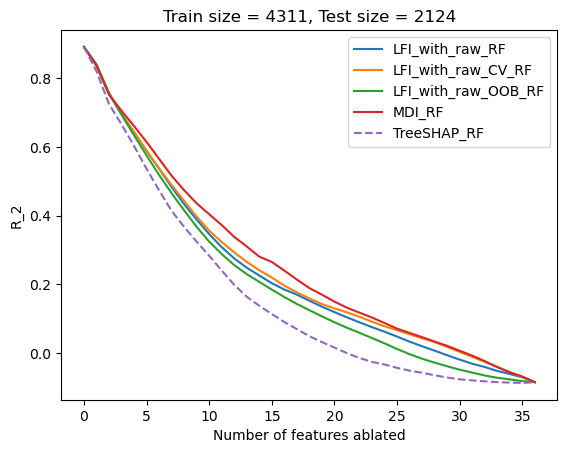

In [9]:
for metric in metrics[task]:
    results = {}
    for m in methods_rf:
        results[m] = []
    for m in methods_rf:
        results[m].append(combined_df[combined_df['fi'] == m][metric+f"_before_ablation"].mean())
        for i in range(num_features):
            results[m].append(combined_df[combined_df['fi'] == m][metric+f"_after_ablation_{i+1}"].mean())
    fig, ax = plt.subplots()
    for m in methods_rf:
        if m in ["TreeSHAP_RF"]:#, "LIME_RF_plus"]:
            ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed')
        else:
            ax.plot(range(num_features+1), results[m], label=m)
    ax.set(xlabel='Number of features ablated', ylabel=metric,
            title=f'Train size = {n_testsize["train_size"].values[0]}, Test size = {n_testsize["test_size"].values[0]}')
    ax.legend()
    # plt.savefig(f"ablation_fico.png")
    plt.show()

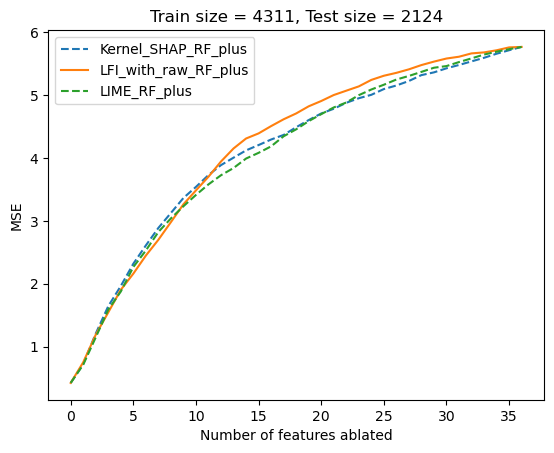

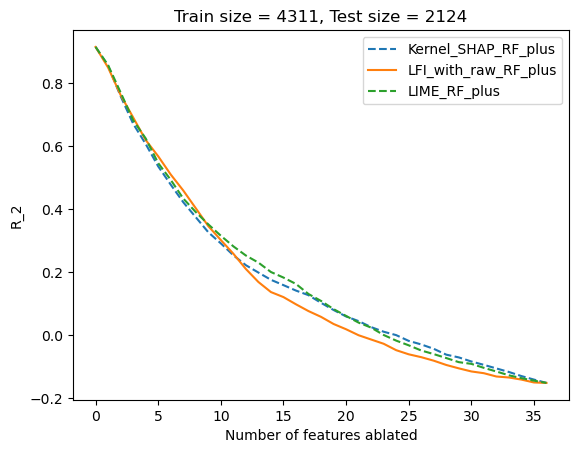

In [10]:
for metric in metrics[task]:
    results = {}
    for m in methods_rf_plus:
        results[m] = []
    for m in methods_rf_plus:
        results[m].append(combined_df[combined_df['fi'] == m][metric+f"_before_ablation"].mean())
        for i in range(num_features):
            results[m].append(combined_df[combined_df['fi'] == m][metric+f"_after_ablation_{i+1}"].mean())
    fig, ax = plt.subplots()
    for m in methods_rf_plus:
        if m in ["Kernel_SHAP_RF_plus", "LIME_RF_plus"]:
            ax.plot(range(num_features+1), results[m], label=m, linestyle='dashed')
        else:
            ax.plot(range(num_features+1), results[m], label=m)
    ax.set(xlabel='Number of features ablated', ylabel=metric,
            title=f'Train size = {n_testsize["train_size"].values[0]}, Test size = {n_testsize["test_size"].values[0]}')
    ax.legend()
    # plt.savefig(f"ablation_fico.png")
    plt.show()